# Set up

In [ ]:
import pandas as pd
import numpy as np
import os
from random import randint
from nltk import RegexpTokenizer
from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
import string
import scipy.stats

In [ ]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(parent_dir, 'data')
models_dir = os.path.join(parent_dir, 'models')
print('working directory: ', os.getcwd())
print('data directory:    ', data_dir, )
print('models directory:  ', models_dir)

In [ ]:
# change pandas column width so we can see the posts
pd.get_option('max_colwidth')
pd.set_option('max_colwidth', 2000)

# Prepare data 

In [ ]:
# read the data from disk
data = pd.read_pickle(os.path.join(data_dir, 'data_clean_4cols_2.pickle'))

In [93]:
# join all messages by the same candidate
candidate_data = pd.DataFrame()
candidate_data = (data[['Partei_ABK', 'from_name']].drop_duplicates('from_name')
                                                   .set_index('from_name'))
candidate_data['messages'] = data.groupby('from_name')['message'].apply(' '.join)

In [94]:
n = 50
#candidate_data = candidate_data.sample(n=n)

## Tokenization and cleaning

In [96]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [97]:
stopwords.words('german')

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 'hier',
 '

In [ ]:
# define a function fo cleaning and tokenization
def nlp_clean(messages):
    cleaned = []
    for message in messages:
        message = message.lower()
        message = TweetTokenizer().tokenize(message)
        words = [word for word in message if (word not in stopwords.words('german')
                                              and word not in string.punctuation + '„“‘´'
                                              and not word.startswith('http')
                                              and not word.isdigit())]
        cleaned.append(words)
    return cleaned

In [95]:
#documents = nlp_clean(candidate_data['messages'])

In [98]:
# Choose a random document/candidate
i = randint(0, n-1)
i

13

In [99]:
# show the document 
candidate_data.iloc[i,:].to_frame().T

Partei_ABK  \
Patrick Schnieder        CDU   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          messages  
Patrick Schnieder  Ein frohes, gesegnetes, gutes, gesundes und erfolgreiches neues Jahr! #berlin #ditisberlin #eifel #eifelturm #A1-#Lückenschluss: Die Landesregierung und Verkehrsminister Wissing müssen endlich aus den Puschen kommen und so schnell wie möglich Baurecht schaffen! Geldsorgen gehören in Mainz anscheinend der Vergangenheit an. Anders lässt sich nicht erklären, dass Verkehrsminister Wissing auf mehr als 30 Millionen Euro aus Berlin für Fernstraßen in Rheinland-Pfalz verzichtet. Das Geld fließt jetzt stattdessen nach Bayern. New year, same story.\nhttp://www.patrick-schnieder.de/artikel/rheinland-pfaelzische-verkehrspolitik-ist-und-bleibt-ein-trauerspiel Die Vereinsgemeinschaft Krautscheid nutzt das noch junge Jahr und besucht derzeit Berlin. Heute steht der Besuch im Deutschen Bundestag auf dem Gruppenprogramm. Danke für den Besuch im Haus und das angeregte Gespräch! Weiterhin viel Spaß in Berlin. #Dreikönigstagung des #Bauern- und #Winzerverbandes #Bernkastel-#Wittlich. #eifel #eifelturm #Neujahrsempfang der #CDU #Bernkastel-#Kues. Auf dass 2017 ein erfolgreiches Jahr werde! @cdurlp #eifel #eifelturm #Neujahrsempfang der #CDU-#Kelberg. Engagierte Truppe! @cdurlp #vulkaneifel #eifelturm Lösung für Notärzte an Krankenhäusern der Region in Sicht!\nWie von meinen Kollegen und mir vorgeschlagen, sollen Honorarnotärzte in einem praxistauglichen Umfang von der Sozialversicherungspflicht befreit werden. Damit sorgen wir für die Sicherstellung der Notarztversorgung in ländlichen Regionen wie der Eifel.\nhttp://www.patrick-schnieder.de/artikel/loesung-fuer-notaerzte-krankenhaeusern-der-region-sicht Neujahrsgespräch der Verbandsgemeinde #Prüm mit dem Kabarettisten Thomas C. #Breuer. Begrüßung durch Bürgermeister #Söhngen und musikalische Umrahmung durch das Orchester der #Westeifel #Werke. #eifel #eifelturm Zu Gast bei Freunden. Tolle Truppe! Bin stolz, deren Schirmherr zu sein. Auf den Weg aus d

In [100]:
# show the tokenized and  cleaned document 
documents[i]

['frohes',
 'gesegnetes',
 'gutes',
 'gesundes',
 'erfolgreiches',
 'neues',
 'jahr',
 '#berlin',
 '#ditisberlin',
 '#eifel',
 '#eifelturm',
 '#a1',
 '#lückenschluss',
 'landesregierung',
 'verkehrsminister',
 'wissing',
 'müssen',
 'endlich',
 'puschen',
 'kommen',
 'schnell',
 'möglich',
 'baurecht',
 'schaffen',
 'geldsorgen',
 'gehören',
 'mainz',
 'anscheinend',
 'vergangenheit',
 'lässt',
 'erklären',
 'dass',
 'verkehrsminister',
 'wissing',
 'mehr',
 'millionen',
 'euro',
 'berlin',
 'fernstraßen',
 'rheinland-pfalz',
 'verzichtet',
 'geld',
 'fließt',
 'stattdessen',
 'bayern',
 'new',
 'year',
 'same',
 'story',
 'vereinsgemeinschaft',
 'krautscheid',
 'nutzt',
 'junge',
 'jahr',
 'besucht',
 'derzeit',
 'berlin',
 'heute',
 'steht',
 'besuch',
 'deutschen',
 'bundestag',
 'gruppenprogramm',
 'danke',
 'besuch',
 'haus',
 'angeregte',
 'gespräch',
 'weiterhin',
 'spaß',
 'berlin',
 '#dreikönigstagung',
 '#bauern',
 '#winzerverbandes',
 '#bernkastel',
 '#wittlich',
 '#eifel',


# Build the vocabulary

In [101]:
# make a list containing all words in the corpus
vocab = [word for words in documents for word in words]

In [102]:
# keep a set of unique words
vocab = list(set(vocab))

In [103]:
m = len(vocab)
m

44501

# doc2vec in theory

1. Algorithms
2. Matrix multiplication example
3. Additional notions
 - softmax and loss function
 - negative sampling and batches

### from word2vec to doc2vec

doc2vec is essentially word2vec with documents being treated __like__ words
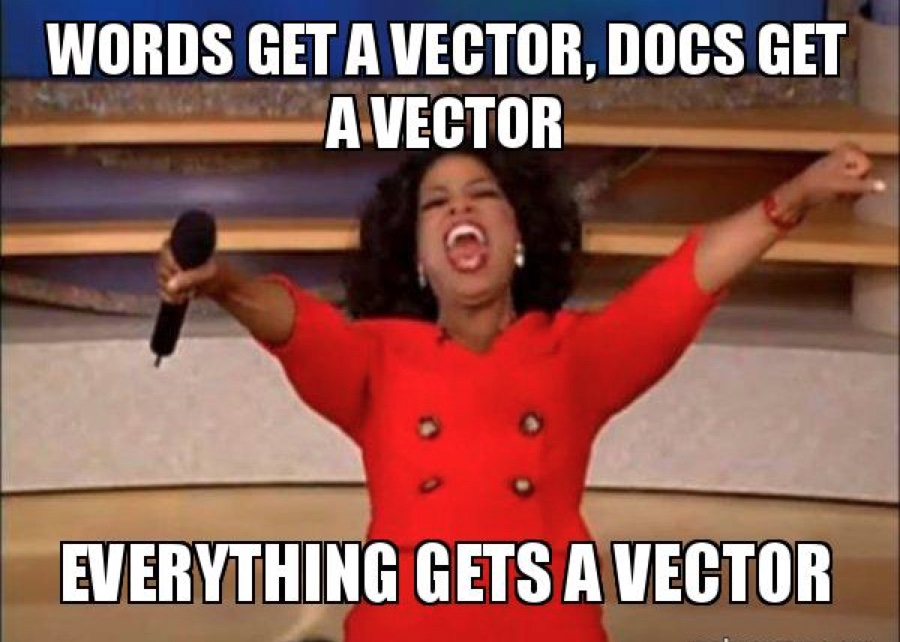

### intro
 - Le and Mikolov 2014 - both are Google guys
 - goal: create a numeric representation of a document (feature vector)
 - algorithm: Distributed Memory version of Paragraph Vector (PV-DM) or PV-DBOW (distributed bag of words)
 - instead of using just words to predict the next word, we also added another feature vector, which is document-unique to serve as a context
 - in a way, it labels the document topic
 - it's an __unsupervised__ model that embeds words in a high-dimensional vector space using a shallow neural network

### on algorithms
Paragraph Vector - Distributed Memory (__PV-DM__)
This is the Paragraph Vector model analogous to Continuous-bag-of-words Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of inferring a center word based on context words and a context paragraph. A paragraph is a context for all words in the paragraph, and a word in a paragraph can have that paragraph as a context.

Paragraph Vector - Distributed Bag of Words (__PV-DBOW__)
This is the Paragraph Vector model analogous to Skip-gram Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.



### PV-DBOW
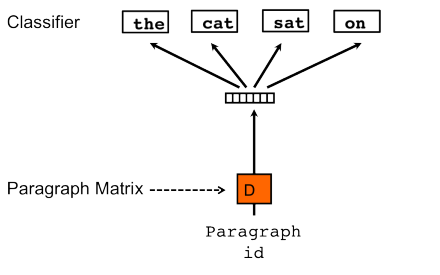
*Le and Mikolov 2014

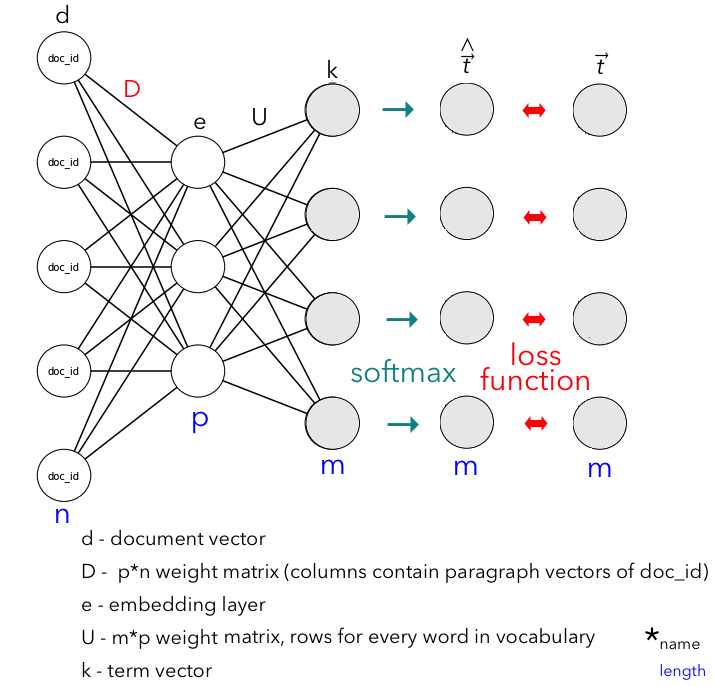

## construct document & term vector

In [106]:
d = np.array(np.zeros(n), ndmin=2).T
d[i] = 1
d.shape

(50, 1)

In [112]:
r = randint(0, len(documents[i]))
target_word = documents[i][r]
target_word

'kreisbeigeordneten'

In [115]:
t = np.array(np.zeros(m), ndmin=2).T
idx = vocab.index(target_word)
t[idx] = 1
t.shape
t[idx-5:idx+5]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

###### word window

In [ ]:
window_size=8
doc_words = documents[i]
middle = randint(window_size, len(doc_words) - window_size - 1)
#window_words = [words[c] for c in range(middle - window_size, middle + window_size)]
#print(window_words)

window_words = []
t = []
for c in range(middle - window_size, middle + window_size):
    window_words.append(doc_words[c])
    tt = (np.array(np.zeros(m), ndmin=2).T)
    tt[vocab.index(doc_words[c])] = 1
    t.append(tt)
t[-1][vocab.index(words[c])-5:vocab.index(words[c])+5]

## Embeddings

In [118]:
# p = dimensions of document vectors (no. of features)
p = 100
D = np.random.rand(p, n)
D.shape

(100, 50)

In [119]:
U = scipy.stats.truncnorm.rvs(-2, 2, loc=0, scale=1, size=(m, p))
U.shape

(44501, 100)

In [123]:
e = np.array(np.dot(D, d), ndmin=2)
e.shape

(100, 1)

In [121]:
k = np.array(np.dot(U, e), ndmin=2)
k.shape

(44501, 1)

<img src="SMandLF.jpeg" alt="Drawing" style="width: 800px;"/>

## Softmax

In [124]:
def softmax(k):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(k) / np.sum(np.exp(k), axis=0)  # axis=1 for row-vector, axis=0 for column-vector

In [125]:
t_hat = softmax(k)
t_hat.shape

(44501, 1)

In [126]:
np.sum(t_hat)

1.0000000000000002

## Loss function

In [127]:
def cross_entropy_loss(t, t_hat):
    return - np.dot(t.T, np.log(t_hat))

In [128]:
cross_entropy_loss(t, t_hat)

array([[ 22.92074982]])

# Backpropagation

In [129]:
errors_out = t_hat - t
errors_out#.shape

array([[  6.62455481e-10],
       [  3.22404439e-11],
       [  3.37828661e-09],
       ..., 
       [  4.80343317e-10],
       [  9.57683851e-11],
       [  2.96874987e-11]])

In [130]:
errors_middle = np.dot(U.T, errors_out)
errors_middle.shape

(100, 1)

In [131]:
# define a learning rate
alpha = 0.025

In [132]:
U += - alpha * np.dot(errors_out, e.T)

In [133]:
D += - alpha * np.dot(errors_middle, d.T)

# Putting it together

In [134]:
window_size = 8
alpha = 0.025  # learning rate
p = 100  # p = dimensions of document vectors (no. of features)
m = len(vocab)  # number of words in the corpus 

D = np.random.rand(p, n)  # matrix of document embeddings
U = scipy.stats.truncnorm.rvs(-2, 2, loc=0, scale=1, size=(m, p))  # matrix of softmax weights

In [135]:
epochs = 1
for epoch in range(epochs):
    for i in range(n):
        # Feed-forward
        d = np.array(np.zeros(n), ndmin=2).T
        d[i] = 1
        
        e = np.array(np.dot(D, d), ndmin=2)
        k = np.array(np.dot(U, e), ndmin=2)
        t_hat = softmax(k)
        
        doc_words = documents[i]
        middle = randint(window_size, len(doc_words) - window_size - 1)

        #window_words = []      
        
        errors_out = (np.array(np.zeros(m), ndmin=2).T)
        errors_middle = (np.array(np.zeros(p), ndmin=2).T)
        
        for c in range(middle - window_size, middle + window_size):
            #window_words.append(doc_words[c])
            
            t = (np.array(np.zeros(len(vocab)), ndmin=2).T)
            t[vocab.index(doc_words[c])] = 1
            errors_out += t_hat - t
            errors_middle += np.dot(U.T, errors_out)
            
            if c == middle:
                print(cross_entropy_loss(t, t_hat))

        # Backprogation
        U += - alpha * np.dot(errors_out, e.T)
        D += - alpha * np.dot(errors_middle, d.T)

[[ 18.67685543]]
[[ 22.44345812]]
[[ 17.46263039]]
[[ 13.93690943]]
[[ 24.9361085]]
[[ 20.35700726]]
[[ 31.89521732]]
[[ 30.14143982]]
[[ 10.51200733]]
[[ 33.86948076]]
[[ 20.30962669]]
[[ 30.13597517]]
[[ 11.12554566]]
[[ 23.30960671]]
[[ 15.17005977]]
[[ 24.56527055]]
[[ 25.02919264]]
[[ 30.12342308]]
[[ 18.14499929]]
[[ 21.44915479]]
[[ 25.55582223]]
[[ 29.56070338]]
[[ 18.02299277]]
[[ 32.67582169]]
[[ 27.66041901]]
[[ 22.47402908]]
[[ 32.06340247]]
[[ 21.60248978]]
[[ 11.96000429]]
[[ 22.55867307]]
[[ 25.81352544]]
[[ 20.98587981]]
[[ 21.61668195]]
[[ 19.20026433]]
[[ 20.92777113]]
[[ 22.58726233]]
[[ 27.80982863]]
[[ 23.95877855]]
[[ 20.1456792]]
[[ 17.47782872]]
[[ 19.90682697]]
[[ 15.98237672]]
[[ 10.27065329]]
[[ 21.77673289]]
[[ 19.19325599]]
[[ 25.93623555]]
[[ 20.90625361]]
[[ 21.08912467]]
[[ 26.68182404]]
[[ 21.36253959]]


# Visualize document/candidate vectors

In [136]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2)

In [137]:
party_colors = {'AfD': 'xkcd:blue',
                'DIE LINKE': 'xkcd:magenta',
                'GRÜNE': 'xkcd:grass green',
                'CSU': 'xkcd:sky blue',
                'CDU': 'xkcd:black',
                'FDP': 'xkcd:goldenrod',
                'SPD': 'xkcd:red'}
candidate_data['color'] = candidate_data['Partei_ABK'].map(party_colors)

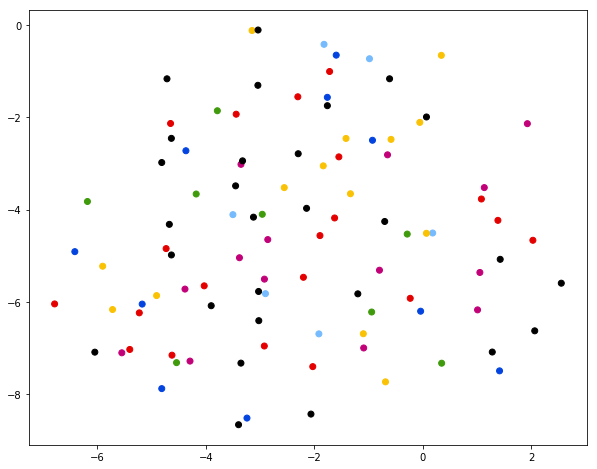

In [138]:
D_tsne = tsne.fit_transform(D)
plt.figure(num=None, figsize=(10, 8))  # set the figure size
plt.scatter(D_tsne[:, 0], D_tsne[:, 1], c=candidate_data['color'])
plt.show()

In [ ]:
D_tsne = tsne.fit_transform(D)
plt.figure(num=None, figsize=(10, 8))  # set the figure size
plt.scatter(D_tsne[:, 0], D_tsne[:, 1], c=candidate_data['color'])
plt.show()

## too many words...

softmax has to weight over ALL words of the given vocabulary - might be very time consuming, so:
- it will sample a text window, and then offer all the words in this text window in the same batch (same iteration of SGD) 
- __hierarchical softmax__ (tree, indexing the words in vocab) vs __negative smapling__ (output layer will contain correct words and only a bunch of incorrect ones)